# Clusterización del conjunto de datos IRIS

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [6]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df_iris = df_iris.assign(target = iris.target)

In [8]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## K means 

Sea $\{X_1, X_2, \ldots, X_n \}$ el conjunto de datos que deseamos clusterizar, con $X_i = (x_{i1}, x_{i2}, \ldots, x_{ip})$ para toda $i$. Por clusterización entendemos como una partición $P =\{C_1, C_2, \ldots, C_k \}$ del conjunto $\{1, \ldots, n\}$.

El problema consiste en resolver el siguiente problema de optimización:

$$ \min_{C_1, C_2, \ldots C_k}{\sum{W(C_k)}}, $$

donde 

$$ W(C_k) = \frac{1}{\mid C_k \mid} \sum_{i, i' \in C_k}^{}{\sum_{j=1}^{p}{(x_{ij} - x_{i'j})^2}}. $$


El algoritmo K-means se describe como sigue: 
1. Aleatoriamente asigne un número, de $1$ hasta $k$, a las observaciones $X_i$.

2. Itere hasta que la asignación de clusters deje de actualizarse:
    a. Para cada uno de los $K$ clusters, calcule el centroide.
    b. Asigne a cada observación $X_i$, el cluster cuyo distancia al centroide sea mínima.  

Este algoritmo converge a un óptimo local.

In [11]:
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(5)

In [12]:
X = iris.data
y = iris.target

In [13]:
type(X)

numpy.ndarray

In [14]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df_iris['target']

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
df_iris['clusters'] = kmeans.labels_

In [20]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'petal length (cm)')

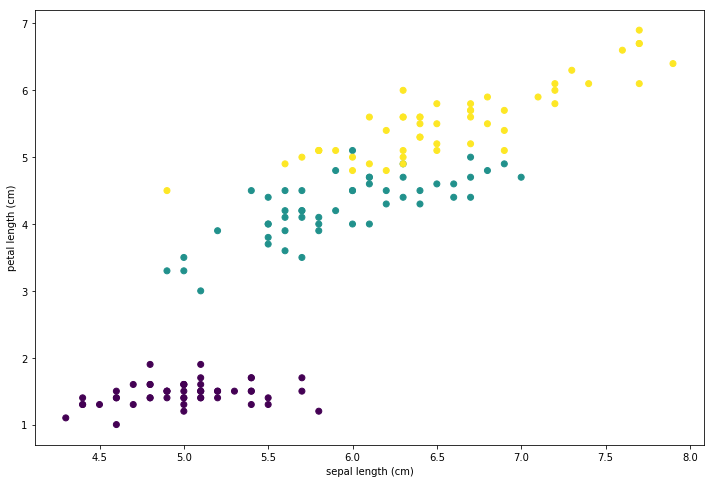

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_iris['sepal length (cm)'],
            y=df_iris['petal length (cm)'],
            c=df_iris['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

In [23]:
mapping = {0: 'o', 1: 'x', 2: '+'}
color = {0: 'g', 1: 'c', 2: 'm'}

In [24]:
x_ = df_iris['sepal length (cm)'].values
y_ = df_iris['petal length (cm)'].values
c_ = df_iris['target'].replace(color).values
m = df_iris['clusters'].replace(mapping).values
n = len(x_)

Text(0, 0.5, 'petal length (cm)')

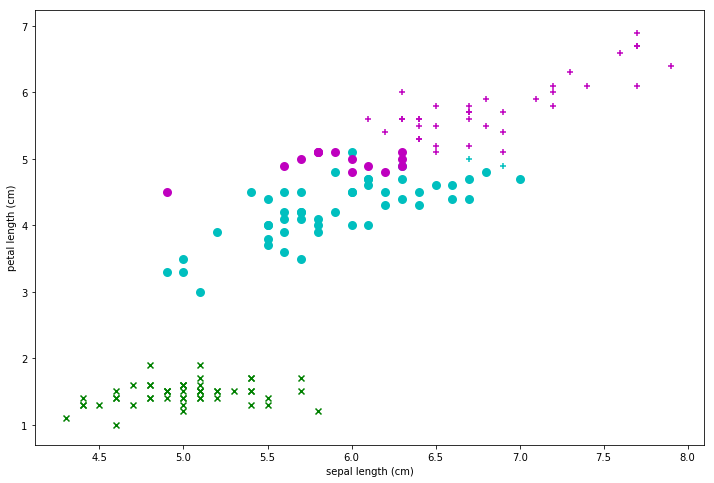

In [25]:
plt.figure(figsize=(12, 8))
for i in range(n):
    plt.scatter(x=x_[i], y=y_[i], c=c_[i], marker=m[i], linewidths=3)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

In [26]:
klist = [1, 2, 3, 4, 5, 6, 7 , 8 , 9, 10]
inertia = []

In [27]:
for k in klist:
    kmeans_model = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeans_model.inertia_)

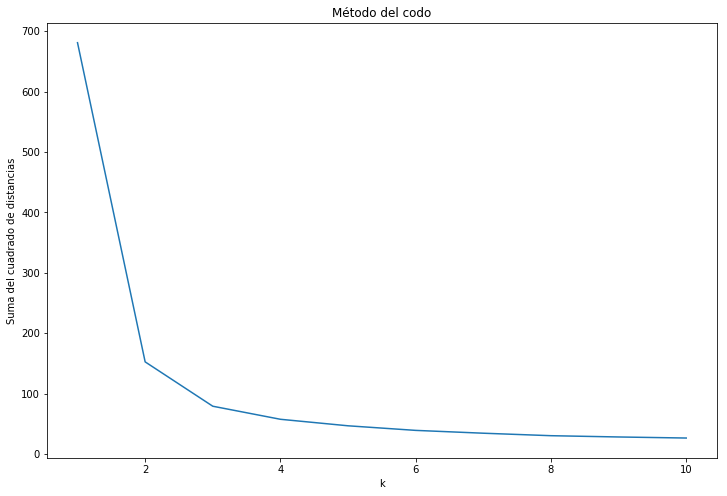

In [28]:
plt.figure(figsize=(12,8))
plt.xlabel('k')
plt.ylabel('Suma del cuadrado de distancias')
plt.title('Método del codo')
plt.plot(klist, inertia)